# sara attia abdel hamid

In [1]:
 #Model Building,Stacking a Model (tf.keras.Sequential)

In [ ]:
import tensorflow as tf

In [19]:
print(tf.__version__)
print(tf.keras.__version__)
import tensorflow.keras.layers as layers 
model = tf.keras.Sequential()
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


2.1.0
2.2.4-tf


In [20]:
# Use the output of the current layer as the input of the next layer.
x = tf.keras.Input(shape=(32,))
h1 = layers.Dense(32, activation='relu')(x)
h2 = layers.Dense(32, activation='relu')(h1)
y = layers.Dense(10, activation='softmax')(h2)
model_sample_2 = tf.keras.models.Model(x, y)
# Print model information.
model_sample_2.summary()

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 32)]              0         
_________________________________________________________________
dense_17 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_18 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_19 (Dense)             (None, 10)                330       
Total params: 2,442
Trainable params: 2,442
Non-trainable params: 0
_________________________________________________________________


In [21]:
# Create a fully connected layer that contains 32 neurons and set the activation function to sigmoid.
# The activation parameter can be set to a function name string, for example, sigmoid, or a function object, for example, tf.sigmoid.
layers.Dense(32, activation='sigmoid')
layers.Dense(32, activation=tf.sigmoid)
# Set kernel_initializer.
layers.Dense(32, kernel_initializer=tf.keras.initializers.he_normal)
# Set kernel_regularizer to the L2 regularization
layers.Dense(32, kernel_regularizer=tf.keras.regularizers.l2(0.01))

In [22]:
layers.Conv2D(64,[1,1],2,padding='same',activation="relu")


In [23]:
layers.MaxPooling2D(pool_size=(2,2),strides=(2,1))


In [24]:
import numpy as np
inputs = tf.keras.Input(shape=(3, 1))
lstm = layers.LSTM(1, return_sequences=True)(inputs)
model_lstm_1 = tf.keras.models.Model(inputs=inputs, outputs=lstm)
inputs = tf.keras.Input(shape=(3, 1))
lstm = layers.LSTM(1, return_sequences=False)(inputs)
model_lstm_2 = tf.keras.models.Model(inputs=inputs, outputs=lstm)
# Sequences t1, t2, and t3
data = [[[0.1],[0.2],[0.3]]]
print(data)
print("output when return_sequences is set to True",model_lstm_1.predict(data))
print("output when return_sequences is set to False",model_lstm_2.predict(data))

[[[0.1], [0.2], [0.3]]]
output when return_sequences is set to True [[[0.02702456]
  [0.07552688]
  [0.13632978]]]
output when return_sequences is set to False [[-0.00363592]]


In [27]:
#LSTM
tf.keras.layers.LSTM(16, return_sequences=True)
#LSTMCell
x = tf.keras.Input((None, 3))
y = layers.RNN(layers.LSTMCell(16))(x)
model_lstm_3= tf.keras.Model(x, y)

In [26]:
model = tf.keras.Sequential()
model.add(layers.Dense(10, activation='softmax'))
# Determine the optimizer, loss function, and model evaluation method (metrics).
model.compile(optimizer=tf.keras.optimizers.Adam(0.001),loss=tf.keras.losses.categorical_crossentropy,metrics=[tf.keras.metrics.categorical_accuracy])

In [28]:
import numpy as np
train_x = np.random.random((1000, 36))
train_y = np.random.random((1000, 10))
val_x = np.random.random((200, 36))
val_y = np.random.random((200, 10))
model.fit(train_x, train_y, epochs=10, batch_size=100,validation_data=(val_x, val_y))


Train on 1000 samples, validate on 200 samples
Epoch 1/10
1000/1000 [==============================] - 1s 754us/sample - loss: 12.6944 - categorical_accuracy: 0.1060 - val_loss: 12.7226 - val_categorical_accuracy: 0.0950
Epoch 2/10
1000/1000 [==============================] - 0s 28us/sample - loss: 12.6946 - categorical_accuracy: 0.1060 - val_loss: 12.7231 - val_categorical_accuracy: 0.0950
Epoch 3/10
1000/1000 [==============================] - 0s 28us/sample - loss: 12.6945 - categorical_accuracy: 0.1060 - val_loss: 12.7226 - val_categorical_accuracy: 0.0950
Epoch 4/10
1000/1000 [==============================] - 0s 30us/sample - loss: 12.6939 - categorical_accuracy: 0.1060 - val_loss: 12.7220 - val_categorical_accuracy: 0.0950
Epoch 5/10
1000/1000 [==============================] - 0s 31us/sample - loss: 12.6940 - categorical_accuracy: 0.1060 - val_loss: 12.7222 - val_categorical_accuracy: 0.0950
Epoch 6/10
1000/1000 [==============================] - 0s 27us/sample - loss: 12.6931 

In [29]:
dataset = tf.data.Dataset.from_tensor_slices((train_x, train_y))
dataset = dataset.batch(32)
dataset = dataset.repeat()
val_dataset = tf.data.Dataset.from_tensor_slices((val_x, val_y))
val_dataset = val_dataset.batch(32)
val_dataset = val_dataset.repeat()
model.fit(dataset, epochs=10, steps_per_epoch=30,
 validation_data=val_dataset, validation_steps=3)

Train for 30 steps, validate for 3 steps
Epoch 1/10
30/30 [==============================] - 1s 20ms/step - loss: 12.6778 - categorical_accuracy: 0.1042 - val_loss: 12.9788 - val_categorical_accuracy: 0.1146
Epoch 2/10
30/30 [==============================] - 0s 2ms/step - loss: 12.7108 - categorical_accuracy: 0.1058 - val_loss: 12.9753 - val_categorical_accuracy: 0.1250
Epoch 3/10
30/30 [==============================] - 0s 2ms/step - loss: 12.7156 - categorical_accuracy: 0.1068 - val_loss: 12.9725 - val_categorical_accuracy: 0.1250
Epoch 4/10
30/30 [==============================] - 0s 2ms/step - loss: 12.6710 - categorical_accuracy: 0.1058 - val_loss: 12.9700 - val_categorical_accuracy: 0.1250
Epoch 5/10
30/30 [==============================] - 0s 2ms/step - loss: 12.6668 - categorical_accuracy: 0.1079 - val_loss: 12.9682 - val_categorical_accuracy: 0.1250
Epoch 6/10
30/30 [==============================] - 0s 2ms/step - loss: 12.6843 - categorical_accuracy: 0.1058 - val_loss: 12.96

In [30]:
import os
# Set hyperparameters.
Epochs = 10
logdir=os.path.join("logs")
if not os.path.exists(logdir):
    os.mkdir(logdir)


In [31]:
# Define a function for dynamically setting the learning rate.
def lr_Scheduler(epoch):
    if epoch > 0.9 * Epochs:
        lr = 0.0001
    elif epoch > 0.5 * Epochs:

        lr = 0.001
    elif epoch > 0.25 * Epochs:
        lr = 0.01
    else:
        lr = 0.1
        print(lr)
        return lr

In [35]:
callbacks = [
 tf.keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=1e-2,patience=2),
    tf.keras.callbacks.ModelCheckpoint(filepath='testmodel_{epoch}.h5',save_best_only=True,monitor='val_loss'),
    tf.keras.callbacks.LearningRateScheduler(lr_Scheduler),
    tf.keras.callbacks.TensorBoard(log_dir=logdir)]


In [36]:
model.fit(train_x, train_y, batch_size=16, epochs=Epochs,callbacks=callbacks, validation_data=(val_x, val_y))


Train on 1000 samples, validate on 200 samples
0.1
Epoch 1/10
1000/1000 [==============================] - 1s 838us/sample - loss: 12.9519 - categorical_accuracy: 0.1060 - val_loss: 12.5188 - val_categorical_accuracy: 0.0950
0.1
Epoch 2/10
1000/1000 [==============================] - 0s 251us/sample - loss: 12.8974 - categorical_accuracy: 0.1130 - val_loss: 12.6002 - val_categorical_accuracy: 0.1050
0.1
Epoch 3/10
1000/1000 [==============================] - 0s 242us/sample - loss: 12.9147 - categorical_accuracy: 0.1040 - val_loss: 12.3818 - val_categorical_accuracy: 0.0900


ValueError: The output of the "schedule" function should be float.

In [38]:
# Model evaluation
test_x = np.random.random((1000, 36))
test_y = np.random.random((1000, 10))
model.evaluate(test_x, test_y, batch_size=32)

1000/1000 [==============================] - 0s 35us/sample - loss: 13.0265 - categorical_accuracy: 0.1070


[13.026459930419922, 0.107]

In [39]:
# Model prediction
pre_x = np.random.random((10, 36))
result = model.predict(test_x,)
print(result)


[[0.20692551 0.12475058 0.08755362 ... 0.19164366 0.01151823 0.08980513]
 [0.11304864 0.06664471 0.15788448 ... 0.17731936 0.00805586 0.05986404]
 [0.10042936 0.08679244 0.06033625 ... 0.23686416 0.02294443 0.13470602]
 ...
 [0.17441499 0.05488211 0.03738982 ... 0.13900484 0.0136529  0.08624688]
 [0.1940296  0.05794618 0.10493337 ... 0.09160835 0.00847112 0.18218496]
 [0.11376817 0.11578567 0.08522402 ... 0.28571653 0.00785722 0.12786616]]


In [41]:
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, optimizers, datasets
from matplotlib import pyplot as plt
import numpy as np
(x_train_raw, y_train_raw), (x_test_raw, y_test_raw) = datasets.mnist.load_data() 
print(y_train_raw[0])
print(x_train_raw.shape, y_train_raw.shape)
print(x_test_raw.shape, y_test_raw.shape)
# Convert the labels into one-hot codes.
num_classes = 10
y_train = keras.utils.to_categorical(y_train_raw, num_classes)
y_test = keras.utils.to_categorical(y_test_raw, num_classes)
print(y_train[0])

11493376/11490434 [==============================] - 11s 1us/step
5
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


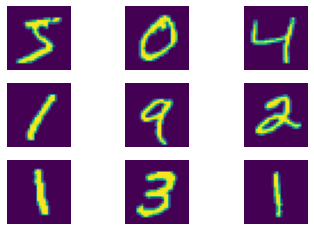

In [44]:
plt.figure()
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train_raw[i])
    plt.axis('off')
plt.show()


In [45]:
# Convert a 28 x 28 image to a 784 x 1 vector.
x_train = x_train_raw.reshape(60000, 784)
x_test = x_test_raw.reshape(10000, 784)

In [46]:
# Normalize image pixel values.
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [47]:
model = keras.Sequential([ 
 layers.Dense(512, activation='relu', input_dim = 784),
 layers.Dense(256, activation='relu'),
 layers.Dense(124, activation='relu'),
layers.Dense(num_classes, activation='softmax')])
model.summary()


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_26 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_27 (Dense)             (None, 124)               31868     
_________________________________________________________________
dense_28 (Dense)             (None, 10)                1250      
Total params: 566,366
Trainable params: 566,366
Non-trainable params: 0
_________________________________________________________________


In [48]:
Optimizer = optimizers.Adam(0.001)
model.compile(loss=keras.losses.categorical_crossentropy,
 optimizer=Optimizer,
 metrics=['accuracy'])

In [49]:
# Fit the training data to the model by using the fit method.
model.fit(x_train, y_train,
 batch_size=128,
 epochs=10,
 verbose=1)


Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 84us/sample - loss: 0.2285 - accuracy: 0.9322
Epoch 2/10
60000/60000 [==============================] - 4s 73us/sample - loss: 0.0852 - accuracy: 0.9738
Epoch 3/10
60000/60000 [==============================] - 4s 72us/sample - loss: 0.0542 - accuracy: 0.9828
Epoch 4/10
60000/60000 [==============================] - 4s 71us/sample - loss: 0.0417 - accuracy: 0.9866
Epoch 5/10
60000/60000 [==============================] - 4s 69us/sample - loss: 0.0311 - accuracy: 0.9897
Epoch 6/10
60000/60000 [==============================] - 4s 67us/sample - loss: 0.0259 - accuracy: 0.9917
Epoch 7/10
60000/60000 [==============================] - 4s 67us/sample - loss: 0.0220 - accuracy: 0.9928
Epoch 8/10
60000/60000 [==============================] - 4s 67us/sample - loss: 0.0206 - accuracy: 0.9932
Epoch 9/10
60000/60000 [==============================] - 4s 74us/sample - loss: 0.0165 - accuracy: 0.9947s - loss: 0.0
E

In [50]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.10060911036527287
Test accuracy: 0.9762


In [51]:
logdir='./mnist_model'
if not os.path.exists(logdir):
    os.mkdir(logdir)
model.save(logdir+'/final_DNN_model.h5')


In [52]:
import tensorflow as tf
from tensorflow import keras
import numpy as np


In [54]:
model=keras.Sequential() # Create a network sequence.
## Add the first convolutional layer and pooling layer.
model.add(keras.layers.Conv2D(filters=32,kernel_size = 5,strides = (1,1),
 padding = 'same',activation = tf.nn.relu,input_shape = (28,28,1)))
model.add(keras.layers.MaxPool2D(pool_size=(2,2), strides = (2,2), padding = 'valid'))
## Add the second convolutional layer and pooling layer.
model.add(keras.layers.Conv2D(filters=64,kernel_size = 3,strides = (1,1),padding = 'same',activation = tf.nn.relu))
model.add(keras.layers.MaxPool2D(pool_size=(2,2), strides = (2,2), padding = 'valid'))
## Add a dropout layer to reduce overfitting.
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Flatten())
## Add two fully connected layers.
model.add(keras.layers.Dense(units=128,activation = tf.nn.relu))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(units=10,activation = tf.nn.softmax))

In [55]:
# Expand data dimensions to adapt to the CNN model.
X_train=x_train.reshape(60000,28,28,1)
X_test=x_test.reshape(10000,28,28,1)
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=['accuracy']) 
model.fit(x=X_train,y=y_train,epochs=5,batch_size=128)


Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 62s 1ms/sample - loss: 0.2819 - accuracy: 0.9117
Epoch 2/5
60000/60000 [==============================] - 62s 1ms/sample - loss: 0.0961 - accuracy: 0.9719
Epoch 3/5
60000/60000 [==============================] - 63s 1ms/sample - loss: 0.0710 - accuracy: 0.9786
Epoch 4/5
60000/60000 [==============================] - 60s 993us/sample - loss: 0.0571 - accuracy: 0.9827
Epoch 5/5
60000/60000 [==============================] - 61s 1ms/sample - loss: 0.0507 - accuracy: 0.9846


In [56]:
test_loss,test_acc=model.evaluate(x=X_test,y=y_test)
print("Test Accuracy %.2f"%test_acc)

10000/10000 [==============================] - 3s 321us/sample - loss: 0.0253 - accuracy: 0.9919
Test Accuracy 0.99


In [57]:
ogdir='./mnist_model'
if not os.path.exists(logdir):
    os.mkdir(logdir)
model.save(logdir+'/final_CNN_model.h5')

In [64]:
#Image Classification

In [65]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, optimizers, datasets, Sequential
from tensorflow.keras.layers import Conv2D,Activation,MaxPooling2D,Dropout,Flatten,Dense
import os
import numpy as np
import matplotlib.pyplot as plt

In [66]:
# Download the dataset.
(x_train,y_train), (x_test, y_test) = datasets.cifar10.load_data()
# Print the dataset size.
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)
print(y_train[0])
# Convert the labels.
num_classes = 10
y_train_onehot = keras.utils.to_categorical(y_train, num_classes)
y_test_onehot = keras.utils.to_categorical(y_test, num_classes)
y_train[0]

170500096/170498071 [==============================] - 167s 1us/step
(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)
[6]


array([6], dtype=uint8)

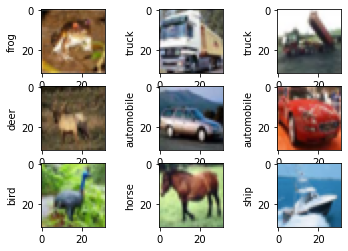

In [67]:
# Generate an image label list.
category_dict = {0:'airplane',1:'automobile',2:'bird',3:'cat',4:'deer',5:'dog',
 6:'frog',7:'horse',8:'ship',9:'truck'}
# Display the first nine images and their labels.
plt.figure()
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i])
    plt.ylabel(category_dict[y_train[i][0]])
plt.show()

In [68]:
# Pixel normalization
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [70]:
def CNN_classification_model(input_size = x_train.shape[1:]):
    model = Sequential() 
    '''Conv1 with 32 3*3 kernels 
 padding="same": it applies zero padding to the input image so that the input image gets fully covered by 
the filter and specified stride.
 It is called SAME because, for stride 1, the output will be the same as the input.
 output: 32*32*32'''
    model.add(Conv2D(32, (3, 3), padding='same', 
    input_shape=input_size)) 
    model.add(Activation('relu')) 
    #Conv2
    model.add(Conv2D(32, (3, 3))) 
    model.add(Activation('relu')) 
    model.add(MaxPooling2D(pool_size=(2, 2),strides =1))
    # The second module
    model.add(Conv2D(64, (3, 3), padding='same')) 
    model.add(Activation('relu')) 
    model.add(Conv2D(64, (3, 3))) 
    model.add(Activation('relu')) 
    model.add(MaxPooling2D(pool_size=(2, 2)))
# Perform flattening before connecting to the fully connected network.
    model.add(Flatten()) 
    model.add(Dense(128)) 
    model.add(Activation('relu')) 
 # The dropout layer parameter value ranges from 0 to 1.
    model.add(Dropout(0.25))
    model.add(Dense(num_classes))
    model.add(Activation('softmax')) 
    opt = keras.optimizers.Adam(lr=0.0001)
    model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy']) 
    return model


model=CNN_classification_model()
model.summary()


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 29, 29, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 29, 29, 64)       

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
model_name = "final_cifar10.h5"
model_checkpoint = ModelCheckpoint(model_name, monitor='loss',verbose=1, save_best_only=True)
# Load the pre-trained model.
trained_weights_path = 'cifar10_weights.h5'
if os.path.exists(trained_weights_path):
 model.load_weights(trained_weights_path, by_name =True)
# Training
model.fit(x_train,y_train, batch_size=32, epochs=10,callbacks = [model_checkpoint],verbose=1)

Train on 50000 samples
Epoch 1/10
49984/50000 [============================>.] - ETA: 0s - loss: 1.6359 - accuracy: 0.4121
Epoch 00001: loss improved from inf to 1.63588, saving model to final_cifar10.h5
50000/50000 [==============================] - 377s 8ms/sample - loss: 1.6359 - accuracy: 0.4121
Epoch 2/10
49984/50000 [============================>.] - ETA: 0s - loss: 1.2953 - accuracy: 0.5389
Epoch 00002: loss improved from 1.63588 to 1.29545, saving model to final_cifar10.h5
50000/50000 [==============================] - 380s 8ms/sample - loss: 1.2955 - accuracy: 0.5388
Epoch 3/10
49984/50000 [============================>.] - ETA: 0s - loss: 1.1499 - accuracy: 0.5945
Epoch 00003: loss improved from 1.29545 to 1.14970, saving model to final_cifar10.h5
50000/50000 [==============================] - 377s 8ms/sample - loss: 1.1497 - accuracy: 0.5946
Epoch 4/10
49984/50000 [============================>.] - ETA: 0s - loss: 1.0458 - accuracy: 0.6332
Epoch 00004: loss improved from 1.1

In [ ]:
new_model = CNN_classification_model()
new_model.load_weights('final_cifar10.h5')
model.evaluate(x_test, y_test, verbose=1)


In [ ]:
# Output the possibility of each class.
new_model.predict(x_test[0:1])

In [ ]:
# Output the prediction result.
new_model.predict_classes(x_test[0:1])


In [ ]:
pred_list = []
plt.figure()
for i in range(0,4):
    plt.subplot(2,2,i+1)
    plt.imshow(x_test[i])
    pred = new_model.predict_classes(x_test[0:10])
    pred_list.append(pred)
    plt.title("pred:"+category_dict[pred[i]]+" actual:"+ category_dict[y_test[i][0]])
    plt.axis('off')
plt.show()
